<br></br>
# **Parse Tree 문장구조 분석**

<br></br>
## **1 Parsing**
문법적 구조를 활용한 분석

In [1]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Okt
twitter = Okt()
words = twitter.pos(text, stem=True)
print(words)

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 7.34 s, sys: 375 ms, total: 7.71 s
Wall time: 2.89 s


In [2]:
from nltk import RegexpParser

grammar = """
NP: {<N.*>*<Suffix>?}   # 명사구를 정의한다
VP: {<V.*>*}            # 동사구를 정의한다
AP: {<A.*>*}            # 형용사구를 정의한다 """
parser = RegexpParser(grammar)
parser

<chunk.RegexpParser with 3 stages>

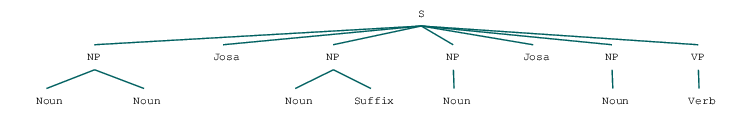

In [3]:
chunks = parser.parse(words)
chunks

In [4]:
text_tree = [list(txt)    for txt in chunks.subtrees()]
from pprint import pprint
pprint(text_tree)

[[Tree('NP', [('민병삼', 'Noun'), ('대령', 'Noun')]),
  ('의', 'Josa'),
  Tree('NP', [('항', 'Noun'), ('명', 'Suffix')]),
  Tree('NP', [('행위', 'Noun')]),
  ('로', 'Josa'),
  Tree('NP', [('초치', 'Noun')]),
  Tree('VP', [('하다', 'Verb')])],
 [('민병삼', 'Noun'), ('대령', 'Noun')],
 [('항', 'Noun'), ('명', 'Suffix')],
 [('행위', 'Noun')],
 [('초치', 'Noun')],
 [('하다', 'Verb')]]


<br></br>
## **2 촘스키 CGF 문법규칙 활용**
Penn Treebank Corpus

In [5]:
# import nltk
# nltk.download('treebank')

In [6]:
from nltk.corpus import treebank
print(treebank.words('wsj_0007.mrg'))        
print(treebank.tagged_words('wsj_0007.mrg')) 
print(treebank.parsed_sents('wsj_0007.mrg')[2])

['McDermott', 'International', 'Inc.', 'said', '0', ...]
[('McDermott', 'NNP'), ('International', 'NNP'), ...]
(S
  (NP-SBJ
    (NP (NNP Bailey) (NNP Controls))
    (, ,)
    (VP
      (VBN based)
      (NP (-NONE- *))
      (PP-LOC-CLR
        (IN in)
        (NP (NP (NNP Wickliffe)) (, ,) (NP (NNP Ohio)))))
    (, ,))
  (VP
    (VBZ makes)
    (NP
      (JJ computerized)
      (JJ industrial)
      (NNS controls)
      (NNS systems)))
  (. .))


In [7]:
from nltk.grammar import toy_pcfg2
grammar = toy_pcfg2
print(grammar)

Grammar with 23 productions (start state = S)
    S -> NP VP [1.0]
    VP -> V NP [0.59]
    VP -> V [0.4]
    VP -> VP PP [0.01]
    NP -> Det N [0.41]
    NP -> Name [0.28]
    NP -> NP PP [0.31]
    PP -> P NP [1.0]
    V -> 'saw' [0.21]
    V -> 'ate' [0.51]
    V -> 'ran' [0.28]
    N -> 'boy' [0.11]
    N -> 'cookie' [0.12]
    N -> 'table' [0.13]
    N -> 'telescope' [0.14]
    N -> 'hill' [0.5]
    Name -> 'Jack' [0.52]
    Name -> 'Bob' [0.48]
    P -> 'with' [0.61]
    P -> 'under' [0.39]
    Det -> 'the' [0.41]
    Det -> 'a' [0.31]
    Det -> 'my' [0.28]


In [8]:
from nltk.grammar import toy_pcfg2
tokens = "jack seat on table".split()
grammar = toy_pcfg2
print(grammar)

Grammar with 23 productions (start state = S)
    S -> NP VP [1.0]
    VP -> V NP [0.59]
    VP -> V [0.4]
    VP -> VP PP [0.01]
    NP -> Det N [0.41]
    NP -> Name [0.28]
    NP -> NP PP [0.31]
    PP -> P NP [1.0]
    V -> 'saw' [0.21]
    V -> 'ate' [0.51]
    V -> 'ran' [0.28]
    N -> 'boy' [0.11]
    N -> 'cookie' [0.12]
    N -> 'table' [0.13]
    N -> 'telescope' [0.14]
    N -> 'hill' [0.5]
    Name -> 'Jack' [0.52]
    Name -> 'Bob' [0.48]
    P -> 'with' [0.61]
    P -> 'under' [0.39]
    Det -> 'the' [0.41]
    Det -> 'a' [0.31]
    Det -> 'my' [0.28]


<br></br>
## **3 Earley 차트 파싱 알고리즘**
1970년 발표한 알고리즘으로 Top-Down 파싱과 유사하고 좌측방향 재귀처리를 통해서 문장을 분석한다

In [9]:
import nltk
nltk.parse.featurechart.demo( print_times   = False, 
                              print_grammar = True, 
                              parser = nltk.parse.featurechart.FeatureChartParser, 
                              sent   = 'I saw a dog' )


Grammar with 18 productions (start state = S[])
    S[] -> NP[] VP[]
    PP[] -> Prep[] NP[]
    NP[] -> NP[] PP[]
    VP[] -> VP[] PP[]
    VP[] -> Verb[] NP[]
    VP[] -> Verb[]
    NP[] -> Det[pl=?x] Noun[pl=?x]
    NP[] -> 'John'
    NP[] -> 'I'
    Det[] -> 'the'
    Det[] -> 'my'
    Det[-pl] -> 'a'
    Noun[-pl] -> 'dog'
    Noun[-pl] -> 'cookie'
    Verb[] -> 'ate'
    Verb[] -> 'saw'
    Prep[] -> 'with'
    Prep[] -> 'under'

* FeatureChartParser
Sentence: I saw a dog
|. I .saw. a .dog.|
|[---]   .   .   .| [0:1] 'I'
|.   [---]   .   .| [1:2] 'saw'
|.   .   [---]   .| [2:3] 'a'
|.   .   .   [---]| [3:4] 'dog'
|[---]   .   .   .| [0:1] NP[] -> 'I' *
|[--->   .   .   .| [0:1] S[] -> NP[] * VP[] {}
|[--->   .   .   .| [0:1] NP[] -> NP[] * PP[] {}
|.   [---]   .   .| [1:2] Verb[] -> 'saw' *
|.   [--->   .   .| [1:2] VP[] -> Verb[] * NP[] {}
|.   [---]   .   .| [1:2] VP[] -> Verb[] *
|.   [--->   .   .| [1:2] VP[] -> VP[] * PP[] {}
|[-------]   .   .| [0:2] S[] -> NP[] VP[] *
|. 